In [5]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Dataset/Mall_Customers.csv")
print(df.head())
print(df.shape)
df.describe()

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(200, 5)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Preprocessing for clusters
df_cluster=df.drop(columns=['CustomerID'])
df_cluster['Gender']=df_cluster['Gender'].map({'Male':0,'Female':1})
df_cluster['Gender'].head()

,Gender
0,0
1,0
2,1
3,1
4,1


In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_features=scaler.fit_transform(df_cluster)

#convert back to DataFrame
import pandas as pd
scaled_df=pd.DataFrame(
    scaled_features,
    columns=df_cluster.columns
)
scaled_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


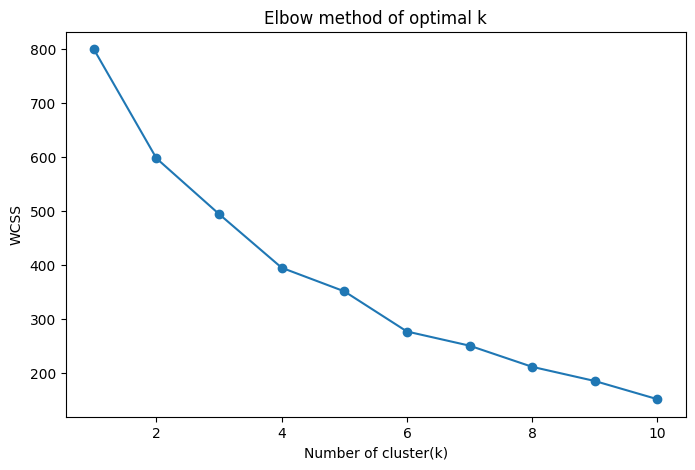

In [9]:
# choosing k Elbow method
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(scaled_df)
  wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("Number of cluster(k)")
plt.ylabel("WCSS")
plt.title("Elbow method of optimal k")
plt.show()

In [17]:
kmeans=KMeans(n_clusters=4,random_state=42)
clusters=kmeans.fit_predict(scaled_df)
df['clusters']=clusters
df.head()
cluster_summary = df.groupby('clusters').mean(numeric_only=True)
cluster_summary

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
clusters,,,,
0,67.783333,54.700000,46.900000,39.933333
1,164.529412,41.264706,88.500000,16.764706
2,100.809524,28.690476,60.904762,70.238095
3,96.953125,29.375000,58.296875,64.437500


In [18]:
df['clusters'].value_counts()

,count
clusters,
3,64
0,60
2,42
1,34


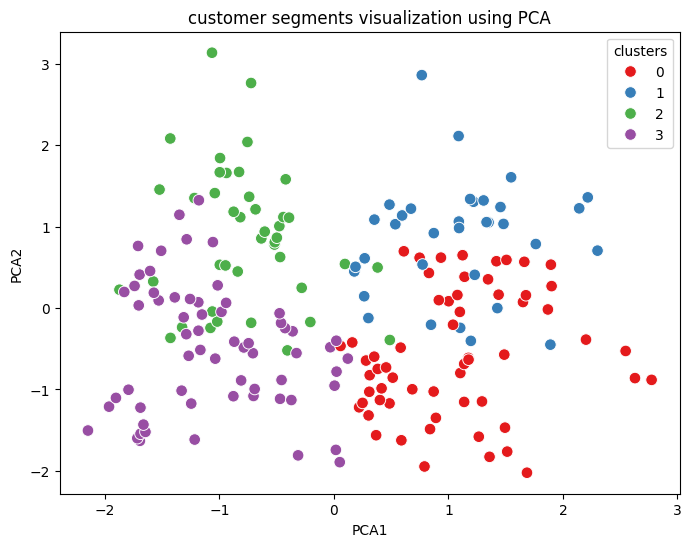

In [21]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_components=pca.fit_transform(scaled_df)

pca_df=pd.DataFrame(
    data=pca_components,
    columns=['pca1','pca2']
)
pca_df['clusters']=df['clusters']
pca_df.head()

#plot clusters
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='pca1',
    y='pca2',
    hue='clusters',
    palette='Set1',
    s=70
)
plt.title("customer segments visualization using PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()
#